In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

#### Carregando os dados

In [3]:
df = pd.read_csv('Dados/facies_vectors.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [4]:
#Verificando os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


---

## <center> Descrição do conjunto de dados </center>

Esse conjunto de dados foi disponibilizado em um desafio da  <a href="https://github.com/seg/2016-ml-contest"> SEG (2016) </a>. (Ver publicação: ).

Foi um desafio relativo a classificação de facies litolológicas (coluna Facies), onde as facies eram particionadas em 9 (nove) labels:

1. Nonmarine sandstone
2. Nonmarine coarse siltstone 
3. Nonmarine fine siltstone 
4. Marine siltstone and shale 
5. Mudstone (limestone)
6. Wackestone (limestone)
7. Dolomite
8. Packstone-grainstone (limestone)
9. Phylloid-algal bafflestone (limestone)

Facies |Label| Adjacent Facies | Facies

:---: | :---: |:--:

1 |SS| 2 | Nonmarine sandstone

2 |CSiS| 1,3 | Nonmarine coarse siltstone  

3 |FSiS| 2 | Nonmarine fine siltstone

4 |SiSh| 5 | Marine siltstone and shale

5 |MS| 4,6 | Mudstone (limestone)

6 |WS| 5,7 | Wackestone (limestone)

7 |D| 6,8 | Dolomite

8 |PS| 6,7,9 | Packstone-grainstone (limestone)

9 |BS| 7,8 | Phylloid-algal bafflestone (limestone)

#### Transformando as variáveis de caracteres em variáveis de quanlitativas

In [5]:
#Criando uma coluna com os labels (caracteres) das facies
def litologia(facies):
    if facies == 1: return 'Nonmarine sandstone'
    if facies == 2: return 'Nonmarine coarse siltstone'
    if facies == 3: return 'Nonmarine fine siltstone'
    if facies == 4: return 'Marine siltstone and shale'
    if facies == 5: return 'Mudstone (limestone)'
    if facies == 6: return 'Wackestone (limestone)'
    if facies == 7: return 'Dolomite'
    if facies == 8: return 'Packstone-grainstone (limestone)'
    if facies == 9:
        return 'Phylloid-algal bafflestone (limestone)'

In [6]:
df['Labels_char'] = df.Facies.apply(litologia)
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone


In [9]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [7]:
# Escolhendo colunas a serem plotadas
cols = ['GR','ILD_log10','DeltaPHI','PHIND','PE']
well = 'SHRIMPLIN'

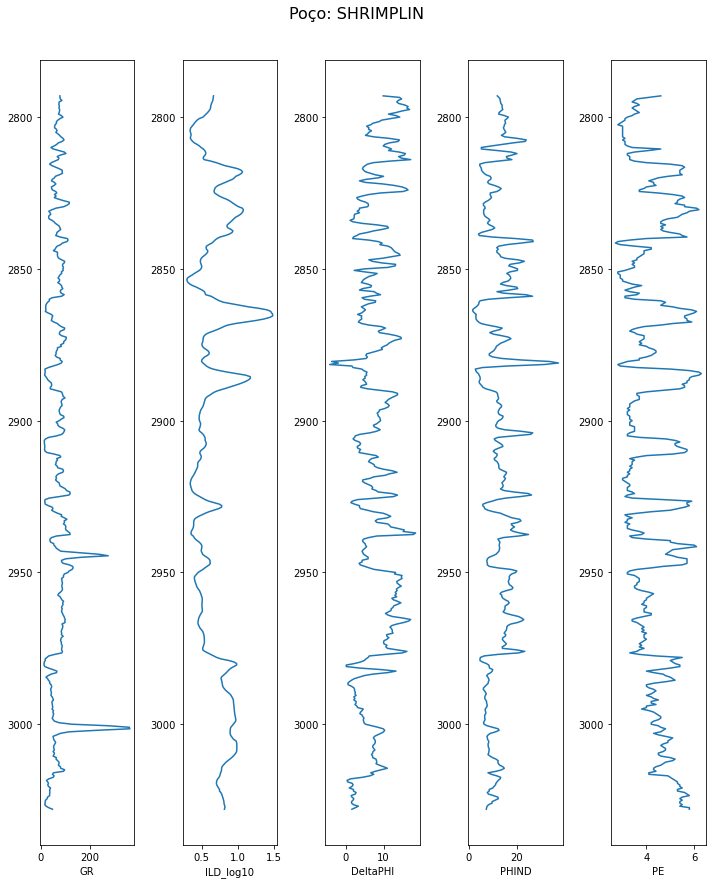

In [8]:
fig,axes = plt.subplots(ncols=5,figsize=(10,12))

for ax in axes:
    ax.invert_yaxis()

for i,ax in zip(cols,axes):
    ax.plot(df[df['Well Name']==well][i],df[df['Well Name']==well]['Depth'])
    ax.set_xlabel(i)

fig.suptitle(f'Poço: {well}', fontsize=16,y=1.02)
    
fig.tight_layout()

### Análise rápida do conjunto de dados

In [10]:
#Verificando os valores NaN do PE
df[df.PE.isnull()]

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char
471,3,A1 SH,ALEXANDER D,2887.5,88.710,0.612,6.700,10.6050,NaN,1,1.000,Nonmarine fine siltstone
472,3,A1 SH,ALEXANDER D,2888.0,92.710,0.583,11.000,12.5150,NaN,1,0.974,Nonmarine fine siltstone
473,3,A1 SH,ALEXANDER D,2888.5,94.540,0.579,12.000,13.4100,NaN,1,0.949,Nonmarine fine siltstone
474,3,A1 SH,ALEXANDER D,2889.0,95.310,0.579,11.500,13.7500,NaN,1,0.923,Nonmarine fine siltstone
475,3,A1 SH,ALEXANDER D,2889.5,93.790,0.572,10.300,13.4050,NaN,1,0.897,Nonmarine fine siltstone
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,9,C LM,Recruit F9,3129.5,19.160,1.162,2.586,7.6070,NaN,2,0.560,Phylloid-algal bafflestone (limestone)
3228,9,C LM,Recruit F9,3130.0,20.461,1.031,2.503,8.6935,NaN,2,0.548,Phylloid-algal bafflestone (limestone)
3229,9,C LM,Recruit F9,3130.5,23.425,0.791,4.017,9.9725,NaN,2,0.536,Phylloid-algal bafflestone (limestone)
3230,9,C LM,Recruit F9,3131.0,31.562,0.759,5.805,9.5265,NaN,2,0.524,Phylloid-algal bafflestone (limestone)


In [11]:
#Consultando poços sem medidas do fator fotoelétrico (PE)
df[df.PE.isnull()]['Well Name'].unique()

array(['ALEXANDER D', 'KIMZEY A', 'Recruit F9'], dtype=object)

##### Analisando variáveis qualitativas

<AxesSubplot:xlabel='count', ylabel='Labels_char'>

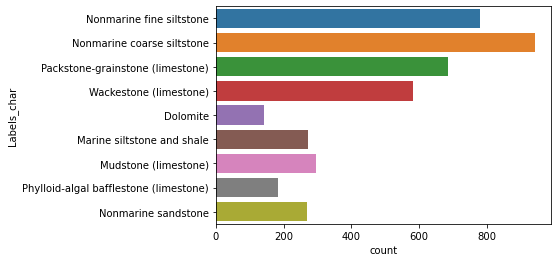

In [12]:
sns.countplot(y=df.Labels_char)

<AxesSubplot:xlabel='NM_M', ylabel='count'>

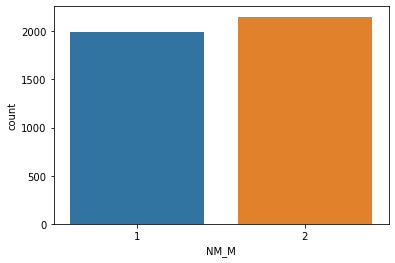

In [13]:
sns.countplot(x=df.NM_M)

<AxesSubplot:xlabel='count', ylabel='Labels_char'>

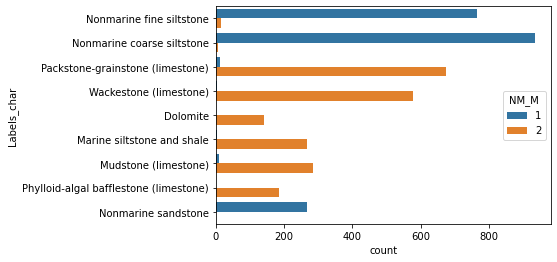

In [14]:
sns.countplot(y=df.Labels_char,hue=df.NM_M)

#### Obtendo a porosidade neutrônica e densidade

$$ DeltaPHI = \phi_{N}-\phi_{D} $$

$$ PHIND = \frac{\phi_{N}+\phi_{D}}{2} $$

$$ \phi_{N} = \frac{DeltaPHI + 2 \times PHIND}{2} $$

$$ \phi_{D} = \frac{-DeltaPHi +2 \times PHIND}{2} $$

In [15]:
#Funções para estimativa da porosidade neutrônica e densidade apartir das variáveis Deltaphi e PHIND
def phi_N(delta_phi,phi_nd):
    delta_phi = np.asarray(delta_phi); phi_nd = np.asarray(phi_nd)
    return (delta_phi+(2*phi_nd))/2

def phi_D(delta_phi,phi_nd):
    delta_phi = np.asarray(delta_phi); phi_nd = np.asarray(phi_nd)
    return (-delta_phi+(2*phi_nd))/2

In [17]:
#Calculando as porosidades densidade e neutrônica
df['PHID'] = phi_D(df.DeltaPHI,df.PHIND)
df['PHIN'] = phi_N(df.DeltaPHI,df.PHIND)

df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050


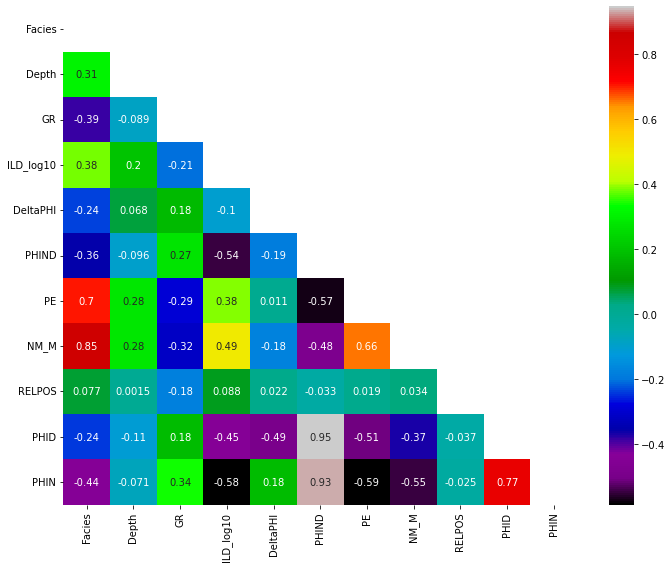

In [28]:
fig,axes = plt.subplots(figsize=(10,8))

corr = df.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask=mask,annot=True,ax=axes,cmap='nipy_spectral')

fig.tight_layout()

#### Criando novas variáveis qualitativas

In [29]:
df.Formation.unique()

array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B2 LM', 'B3 SH',
       'B3 LM', 'B4 SH', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'],
      dtype=object)

In [33]:
encoder = LabelEncoder()
encoder.fit(df.Formation)
df['Formation_num'] = encoder.transform(df.Formation)

In [34]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1


#### Predição das medidas de PE utilizando regressão linear simples

In [553]:
cols_pe = ['ILD_log10','PHIND','Facies']

In [554]:
X_pe = df.loc[idx][cols_pe]
y_pe = df.loc[idx]['PE'] #Separando X e Y

In [555]:
scaler_2 = StandardScaler()
scaler_2.fit(X_pe)
X_scaler_pe = scaler_2.transform(X_pe)

In [556]:
X_train_pe, X_test_pe, y_train_pe, y_test_pe = train_test_split(X_scaler_pe, y_pe, test_size=0.33) #Separando conjunto de treino e teste

In [557]:
mae_train = []
mae_test = []
for i in range(3,51,2):
    knn_reg = KNeighborsRegressor(i)
    knn_reg.fit(X_train_pe,y_train_pe)
    mae_train.append(mean_absolute_error(y_train_pe,knn_reg.predict(X_train_pe)))
    mae_test.append(mean_absolute_error(y_test_pe,knn_reg.predict(X_test_pe)))

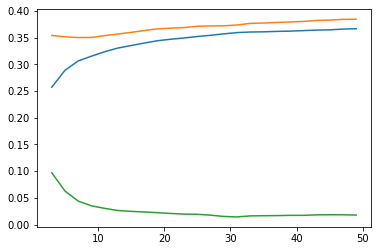

In [558]:
plt.plot(np.arange(3,51,2),mae_train)
plt.plot(np.arange(3,51,2),mae_test)
plt.plot(np.arange(3,51,2),np.asarray(mae_test)-np.asarray(mae_train))

In [559]:
knn_reg = KNeighborsRegressor(20)
knn_reg.fit(X_train_pe,y_train_pe)

KNeighborsRegressor(n_neighbors=20)

In [560]:
mean_absolute_error(y_train_pe,knn_reg.predict(X_train_pe))

0.3460012009237875

In [561]:
mean_absolute_error(y_test_pe,knn_reg.predict(X_test_pe))

0.3671752108716027

In [562]:
df.PE.max()-df.PE.min()

7.893999999999999

In [563]:
#Adicionando valores ao dataframe original

In [564]:
df.loc[df.PE.isnull()][cols_pe]

,ILD_log10,PHIND,Facies
471,0.612,10.6050,3
472,0.583,12.5150,3
473,0.579,13.4100,3
474,0.579,13.7500,3
475,0.572,13.4050,3
...,...,...,...
3227,1.162,7.6070,9
3228,1.031,8.6935,9
3229,0.791,9.9725,9
3230,0.759,9.5265,9


In [565]:
df['PE_reg'] = df.PE.copy()

In [566]:
df['PE_reg'].loc[df.PE.isnull()] = knn_reg.predict(scaler_2.transform(df.loc[df.PE.isnull()][cols_pe]))

C:\Users\alexs\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [567]:
df.loc[df.PE_reg.isnull()]

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,PE_reg


In [568]:
# Escolhendo colunas a serem plotadas
cols_2 = ['GR','ILD_log10','DeltaPHI','PHIND','PE_reg']
well = 'KIMZEY A'

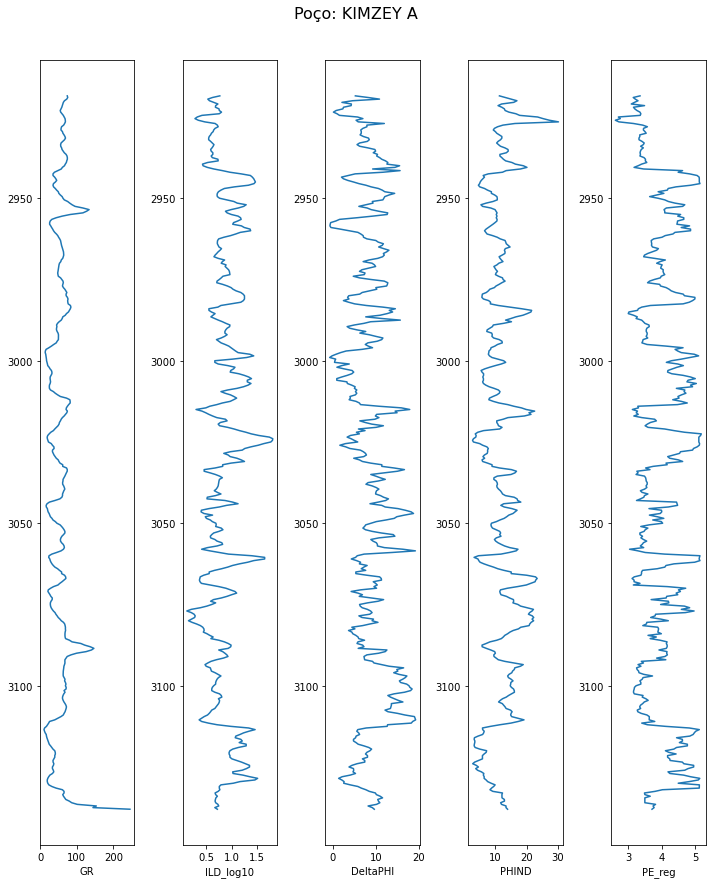

In [569]:
fig,axes = plt.subplots(ncols=5,figsize=(10,12))

for ax in axes:
    ax.invert_yaxis()

for i,ax in zip(cols_2,axes):
    ax.plot(df[df['Well Name']==well][i],df[df['Well Name']==well]['Depth'])
    ax.set_xlabel(i)

fig.suptitle(f'Poço: {well}', fontsize=16,y=1.02)
    
fig.tight_layout()

In [570]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

#### Fazendo a classificação novamente

In [571]:
cols = ['Formation_num','NM_M','GR','ILD_log10','DeltaPHI','PHIND','PE_reg']

X = df[cols]
y = df['Facies'] #Separando X e Y

scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y,
                                                    test_size=0.33) #Separando conjunto de treino e teste

#Usando parâmetros padrões
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [572]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [573]:
cols

['Formation_num', 'NM_M', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE_reg']

In [574]:
print(classification_report(y_train,knn.predict(X_train)))

              precision    recall  f1-score   support

           1       0.80      0.83      0.81       167
           2       0.80      0.81      0.81       626
           3       0.80      0.81      0.80       524
           4       0.70      0.86      0.77       183
           5       0.69      0.65      0.67       206
           6       0.72      0.73      0.73       380
           7       0.77      0.80      0.79        99
           8       0.87      0.73      0.80       466
           9       0.83      0.91      0.87       128

    accuracy                           0.78      2779
   macro avg       0.78      0.79      0.78      2779
weighted avg       0.79      0.78      0.78      2779



In [575]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           1       0.78      0.75      0.77       101
           2       0.71      0.80      0.75       314
           3       0.74      0.69      0.71       256
           4       0.60      0.78      0.68        88
           5       0.47      0.49      0.48        90
           6       0.66      0.59      0.62       202
           7       0.71      0.69      0.70        42
           8       0.73      0.63      0.68       220
           9       0.83      0.86      0.84        57

    accuracy                           0.69      1370
   macro avg       0.69      0.70      0.69      1370
weighted avg       0.70      0.69      0.69      1370



In [586]:
cols = ['Formation_num','NM_M','GR','ILD_log10','DeltaPHI','PHIND','PE_reg']

X = df[cols]
y = df['Facies'] #Separando X e Y

scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y,
                                                    test_size=0.33) #Separando conjunto de treino e teste

#Usando parâmetros padrões
dt = DecisionTreeClassifier(max_depth=12)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [587]:
print(classification_report(y_train,dt.predict(X_train)))

              precision    recall  f1-score   support

           1       0.96      0.89      0.92       183
           2       0.91      0.93      0.92       618
           3       0.92      0.94      0.93       531
           4       0.93      0.88      0.90       175
           5       0.94      0.86      0.90       205
           6       0.88      0.92      0.90       389
           7       0.94      0.89      0.91        87
           8       0.94      0.94      0.94       463
           9       0.96      0.98      0.97       128

    accuracy                           0.92      2779
   macro avg       0.93      0.91      0.92      2779
weighted avg       0.92      0.92      0.92      2779



In [588]:
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           1       0.73      0.67      0.70        85
           2       0.72      0.73      0.72       322
           3       0.69      0.71      0.70       249
           4       0.65      0.56      0.60        96
           5       0.48      0.37      0.42        91
           6       0.56      0.58      0.56       193
           7       0.64      0.46      0.54        54
           8       0.64      0.73      0.68       223
           9       0.77      0.84      0.81        57

    accuracy                           0.66      1370
   macro avg       0.65      0.63      0.64      1370
weighted avg       0.66      0.66      0.65      1370

